<a href="https://colab.research.google.com/github/manasik29/KNearestNeighbors/blob/main/KNearestNeighbor_Zoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

- Implement a KNN model to classify the animals in to categorie

Dataset - Zoo.csv

**Load data and libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/content/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [2]:
data.shape

(101, 18)

In [4]:
data.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [8]:
data.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [ ]:
data[data['type']==1]   #all animal producing milk

In [ ]:
data[data['type']==2]   #all animal with feathers

In [ ]:
data[data['type']==3]   #all animals with tail but no fins

In [ ]:
data[data['type']==4]   #all animal with tail and fins

In [ ]:
data[data['type']==5]

In [ ]:
data[data['type']==6]   

In [ ]:
data[data['type']==7]

**EDA**

In [30]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

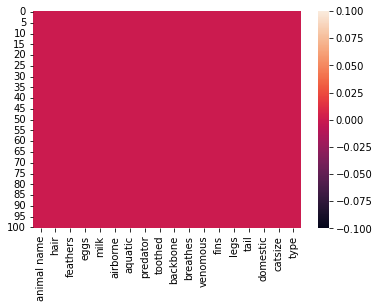

In [31]:
sns.heatmap(data.isna())

In [33]:
#check for duplicates
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [34]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

- No missing values
- No duplicates in data
- No incorrect data type

**Data Visualisaton**

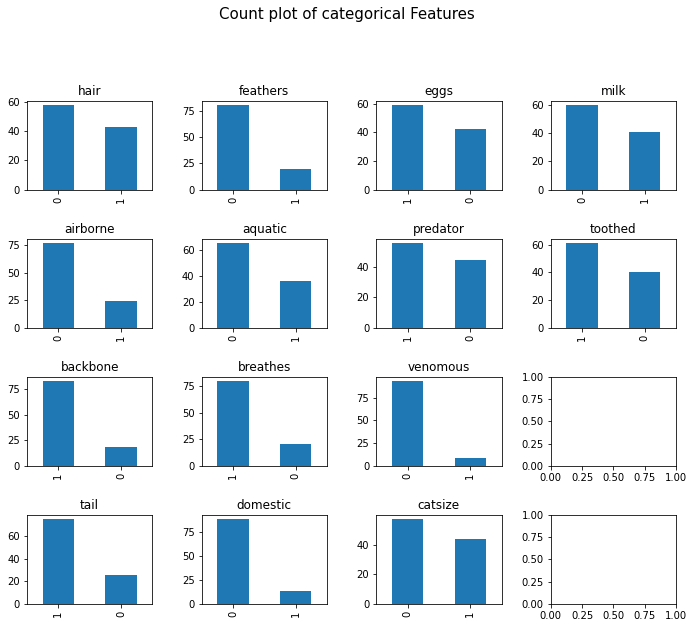

In [92]:
fig, axes=plt.subplots(4, 4,figsize=(10,8),sharex=False,sharey=False)
data['hair'].value_counts().plot.bar(ax=axes[0,0]) 
data['feathers'].value_counts().plot.bar(ax=axes[0,1])
data['eggs'].value_counts().plot.bar(ax=axes[0,2], )
data['milk'].value_counts().plot.bar(ax=axes[0,3])
data['airborne'].value_counts().plot.bar(ax=axes[1,0])
data['aquatic'].value_counts().plot.bar(ax=axes[1,1])
data['predator'].value_counts().plot.bar(ax=axes[1,2])
data['toothed'].value_counts().plot.bar(ax=axes[1,3])
data['backbone'].value_counts().plot.bar(ax=axes[2,0])
data['breathes'].value_counts().plot.bar(ax=axes[2,1])
data['venomous'].value_counts().plot.bar(ax=axes[2,2])
data['tail'].value_counts().plot.bar(ax=axes[3,0])
data['domestic'].value_counts().plot.bar(ax=axes[3,1])
data['catsize'].value_counts().plot.bar(ax=axes[3,2])
axes[0, 0].set_title('hair')
axes[0, 1].set_title('feathers')
axes[0, 2].set_title('eggs')
axes[0, 3].set_title('milk')
axes[1, 0].set_title('airborne')
axes[1, 1].set_title('aquatic')
axes[1, 2].set_title('predator')
axes[1, 3].set_title('toothed')
axes[2, 0].set_title('backbone')
axes[2, 1].set_title('breathes')
axes[2, 2].set_title('venomous')
axes[3, 0].set_title('tail')
axes[3, 1].set_title('domestic')
axes[3, 2].set_title('catsize')
plt.suptitle("Count plot of categorical Features", fontsize=15, y = 1.1)
plt.tight_layout(pad=2.0)

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


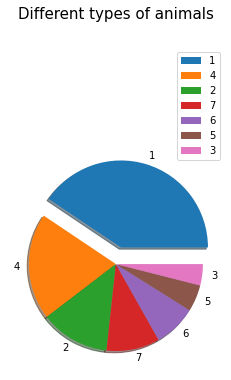

In [85]:
plt.pie(data.type.value_counts(), labels = data.type.unique(), explode= (0.2,0,0,0,0,0,0), shadow=True)
plt.legend(data.type.unique(), bbox_to_anchor=(0,0,1,1.5))
plt.title("Different types of animals", fontsize=15, y= 1.6)
print(data.type.value_counts())

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64


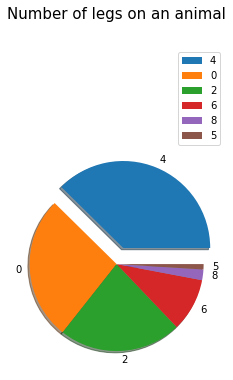

In [83]:
plt.pie(data.legs.value_counts(), labels = data.legs.unique(), explode= (0.2,0,0,0,0,0), shadow=True)
plt.legend(data.legs.unique(), bbox_to_anchor=(0,0,1,1.5))
plt.title("Number of legs on an animal", y = 1.6, fontsize= 15)
print(data.legs.value_counts())

Text(0.5, 1.1, 'Count of Different types of animal in our data')

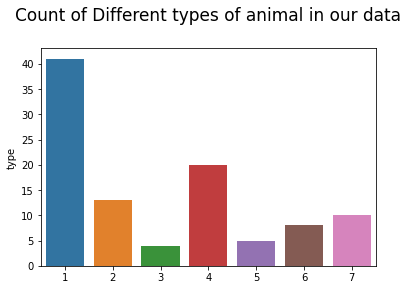

In [91]:
sns.barplot(x=data.type.unique(), y = data.type.value_counts())
plt.title("Count of Different types of animal in our data", fontsize=17, y = 1.1)

Text(0.5, 1.1, 'Count of number of legs on an animal in our data')

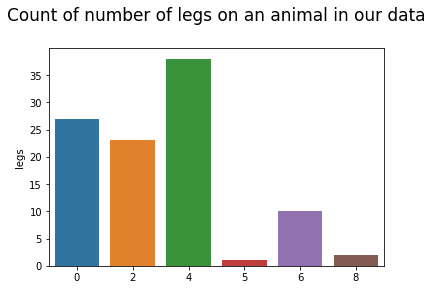

In [90]:
sns.barplot(x=data.legs.unique(), y = data.legs.value_counts())
plt.title("Count of number of legs on an animal in our data", fontsize=17, y = 1.1)

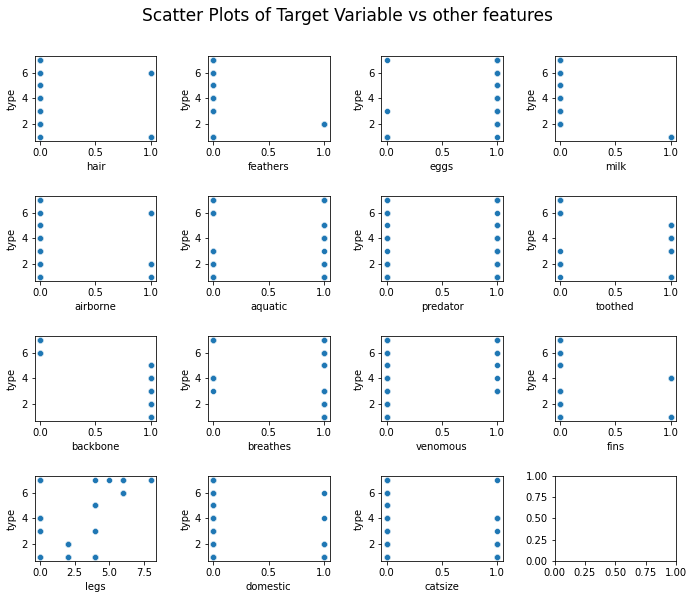

In [79]:
 fig, axes=plt.subplots(4, 4,figsize=(10,8),sharex=False,sharey=False)
sns.scatterplot(y= data.type, x = data.hair, ax=axes[0,0])
sns.scatterplot(y= data.type, x = data.feathers, ax=axes[0,1])
sns.scatterplot(y= data.type, x = data.eggs, ax=axes[0,2])
sns.scatterplot(y= data.type, x = data.milk, ax=axes[0,3])
sns.scatterplot(y= data.type, x = data.airborne, ax=axes[1,0])
sns.scatterplot(y= data.type, x = data.aquatic, ax=axes[1,1])
sns.scatterplot(y= data.type, x = data.predator, ax=axes[1,2])
sns.scatterplot(y= data.type, x = data.toothed, ax=axes[1,3])
sns.scatterplot(y= data.type, x = data.backbone, ax=axes[2,0])
sns.scatterplot(y= data.type, x = data.breathes, ax=axes[2,1])
sns.scatterplot(y= data.type, x = data.venomous, ax=axes[2,2])
sns.scatterplot(y= data.type, x = data.fins, ax=axes[2,3])
sns.scatterplot(y= data.type, x = data.legs, ax=axes[3,0])
sns.scatterplot(y= data.type, x = data.domestic, ax=axes[3,1])
sns.scatterplot(y= data.type, x = data.catsize, ax=axes[3,2])
plt.suptitle("Scatter Plots of Target Variable vs other features", y=1.05, fontsize=17)
plt.tight_layout(pad=2.0)

**Target Variable dependency on Features**

In [51]:
data.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


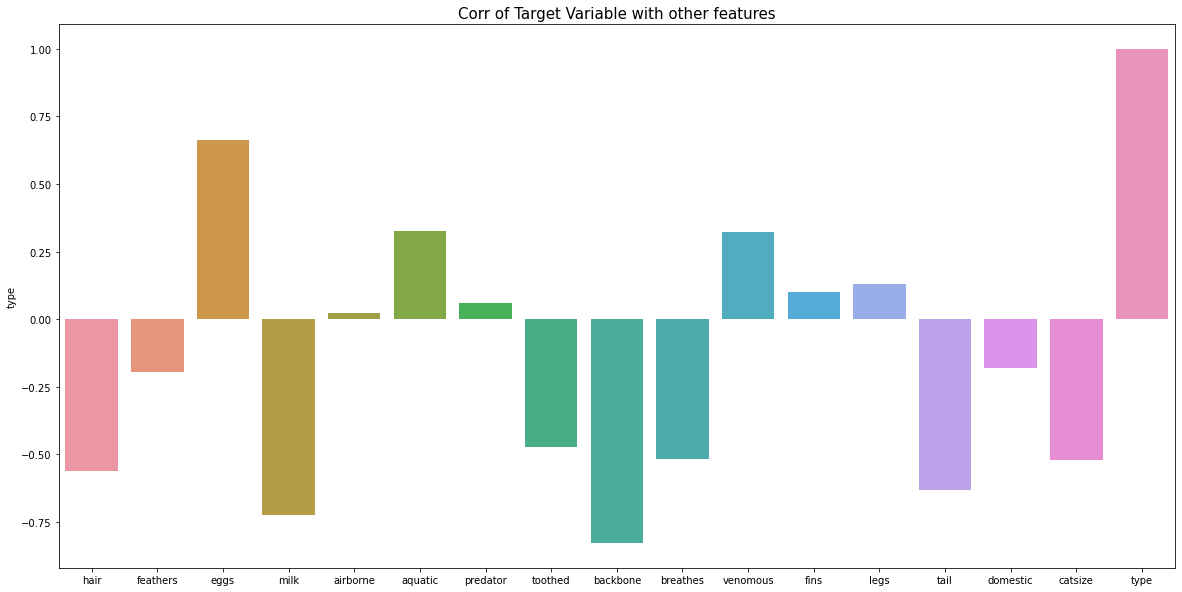

In [94]:
fig = plt.subplots(figsize=(20,10))
plt.title("Corr of Target Variable with other features", fontsize=15, y=1)
sns.barplot(y = data.corr().iloc[-1,:], x=data.corr().columns)

In [49]:
corr_a

hair       -0.562384
feathers   -0.197520
eggs        0.661825
milk       -0.723683
airborne    0.022677
aquatic     0.326639
predator    0.061179
toothed    -0.471527
backbone   -0.828845
breathes   -0.519308
venomous    0.321476
fins        0.099430
legs        0.131693
tail       -0.631830
domestic   -0.181043
catsize    -0.521030
type        1.000000
Name: type, dtype: float64

In [ ]:
!pip install ppscore

In [2]:
import ppscore as pps

In [4]:
score= pps.matrix(data)
score[score['y']=='type']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
17,animal name,type,0.000000,regression,True,mean absolute error,1.643564,1.752692,DecisionTreeRegressor()
35,hair,type,0.182168,regression,True,mean absolute error,1.643564,1.344159,DecisionTreeRegressor()
53,feathers,type,0.000000,regression,True,mean absolute error,1.643564,1.674800,DecisionTreeRegressor()
71,eggs,type,0.306469,regression,True,mean absolute error,1.643564,1.139863,DecisionTreeRegressor()
89,milk,type,0.384672,regression,True,mean absolute error,1.643564,1.011332,DecisionTreeRegressor()
107,airborne,type,0.000000,regression,True,mean absolute error,1.643564,1.879463,DecisionTreeRegressor()
125,aquatic,type,0.041053,regression,True,mean absolute error,1.643564,1.576092,DecisionTreeRegressor()
143,predator,type,0.000000,regression,True,mean absolute error,1.643564,1.820524,DecisionTreeRegressor()
161,toothed,type,0.000000,regression,True,mean absolute error,1.643564,1.775495,DecisionTreeRegressor()
179,backbone,type,0.434204,regression,True,mean absolute error,1.643564,0.929923,DecisionTreeRegressor()


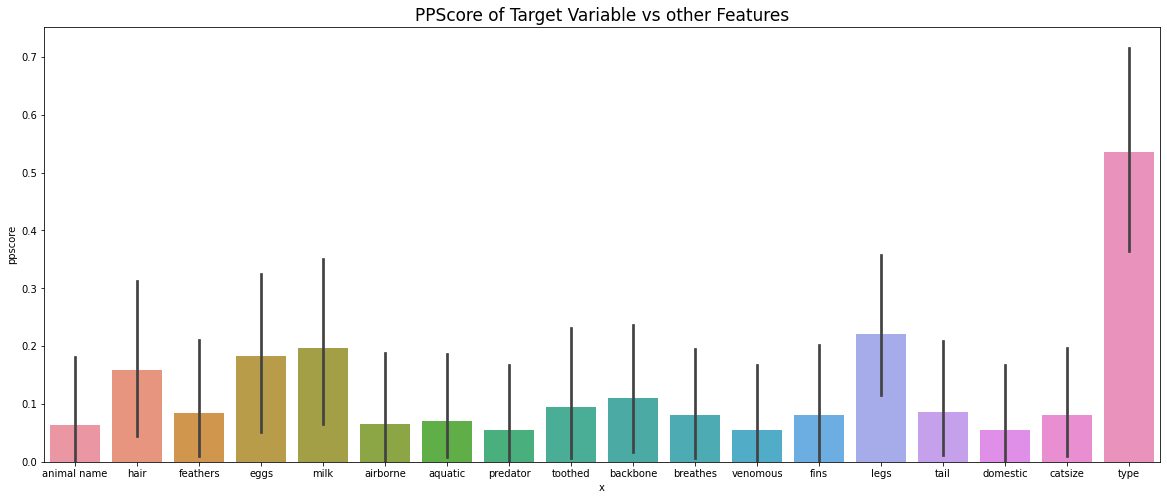

In [95]:
fig, fg=plt.subplots(figsize=(20,8))
plt.title("PPScore of Target Variable vs other Features", fontsize=17)
sns.barplot(y='ppscore', x='x', data=score)

**PreProcessing**

In [10]:
#drop animal as it is not that relevant
data=data.drop('animal name', axis=1)

In [6]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [14]:
#check for outliers
from sklearn.ensemble import IsolationForest
data1=data.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.02)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:17])
data1[data1['anamoly']==-1]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,anamoly
39,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,-1
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-1


We will not be removing these outliers as these are actually living animals. 

In [15]:
from sklearn.preprocessing import MinMaxScaler

#split data into features and target variable
Y = data['type']
x = data.drop('type', axis=1)

In [16]:
#Normalize the data
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [17]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,1.0,0.0,1.0
97,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,0.0
98,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.50,1.0,0.0,1.0
99,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0


**Build a Model**

In [21]:
#K Nearest Neighbor Clssification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

#to get best number of neghbors
kfold = KFold(n_splits=7)
n_neighbors = np.array(range(1,50))               #get accuracy scores for 1<=k<=40, and select the one with highest accuracy.
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=kfold)
grid.fit(X,Y)

print(grid.best_score_)
print(grid.best_params_)

0.9693877551020409
{'n_neighbors': 1}


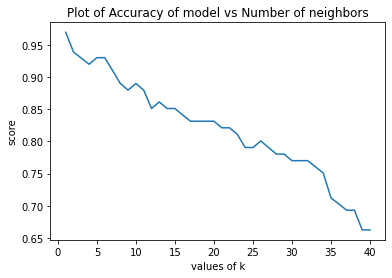

In [76]:
#Visual Representation

#get scores for k between 1 to 41
k_range=range(1,41)
k_score = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X, Y, cv=kfold)
  k_score.append(scores.mean())
#plot score to k
plt.plot(k_range, k_score)  
plt.xlabel("values of k")
plt.ylabel("score")
plt.title("Plot of Accuracy of model vs Number of neighbors")
plt.show()

In [22]:
pred=grid.predict(x)

In [30]:
pred

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [29]:
pd.crosstab(pred, Y)

type,1,2,3,4,5,6,7
row_0,,,,,,,
1,41,0,0,0,0,0,0
2,0,20,0,0,0,0,0
3,0,0,5,0,0,0,0
4,0,0,0,13,0,0,0
5,0,0,0,0,4,0,0
6,0,0,0,0,0,8,0
7,0,0,0,0,0,0,10


**Some results from our Model.**

In [69]:
new_data = pd.DataFrame({"hair": 1, "featers": 0, "eggs": 0, "milk": 1, "airborne": 0, "aquatic": 0, "predator": 0, "toothed": 1, "backbone": 1, 
                         "breathes": 1, "venomous":0, "fins":0, "legs": 4, "tail": 1, "domestic": 1, "catsize": 0}, index =[1])
print("This animal belong to category:" ,grid.predict(new_data)[0])

This animal belong to category: 1


In [70]:
new_data = pd.DataFrame({"hair": 0, "featers": 0, "eggs": 1, "milk": 0, "airborne": 0, "aquatic": 1, "predator": 0, "toothed": 1, "backbone": 1, 
                         "breathes": 0, "venomous": 0, "fins":1, "legs": 0, "tail": 0, "domestic": 0, "catsize": 0}, index =[1])
print("This animal belong to category:" ,grid.predict(new_data)[0])

This animal belong to category: 4


In [71]:
new_data = pd.DataFrame({"hair": 0, "featers": 1, "eggs": 1, "milk": 0, "airborne": 1, "aquatic": 0, "predator": 0, "toothed": 0, "backbone": 1, 
                         "breathes": 1, "venomous": 0, "fins":0, "legs": 2, "tail": 0, "domestic": 0, "catsize": 1}, index =[1])
print("This animal belong to category:" ,grid.predict(new_data)[0])

This animal belong to category: 2
